### **Generalised model**

In [32]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


#import tool for preparing data, splitting into subsets from scikit-learn
from sklearn.model_selection import train_test_split

#machine learning libraries from scikit-learn
from sklearn.linear_model import LogisticRegression                   #Linear Models
from sklearn.ensemble import RandomForestClassifier                   #Tree-Based Models
from sklearn.tree import DecisionTreeClassifier                       #Tree-Based Models
from sklearn.naive_bayes import GaussianNB                            #Bayesian Models
from sklearn.neural_network import MLPClassifier                      #Neural Networks

from sklearn.preprocessing import StandardScaler

#Evaluation Metrics from scikit library
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
#read in the 2013 dataset, Exploratory Data Analysis
data_2013 = pd.read_csv('creditcard_2013.csv')

#show the first five rows of the dataset
pd.options.display.max_columns = None
data_2013.head()

#show the last five rows of the dataset
data_2013.tail()

#display the structure of the dataframe
data_2013.info()

#identify distinct categories or values in the target variable
data_2013.iloc[:, -1].unique()

#check for missing values
data_2013.isna().sum()


#check the dimension of the dataset
print("number of columns: {}".format(data_2013.shape[1]))
print("number of rows: {}".format(data_2013.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
# Check for duplicate values
print("Any duplicates?:", data_2013.duplicated().any())

# Count the number of duplicates
print("Total duplicate rows:", data_2013.duplicated().sum())

# Display duplicate rows
print("Duplicate rows:")
data_2013[data_2013.duplicated()]#drop duplicate values
data_2013 = data_2013.drop_duplicates()
data_2013.shape

#target value count
data_2013['Class'].value_counts()

Any duplicates?: True
Total duplicate rows: 1081
Duplicate rows:


Class
0    283253
1       473
Name: count, dtype: int64

In [4]:
#drop duplicate values
data_2013 = data_2013.drop_duplicates()
data_2013.shape

#target value count
data_2013['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [5]:
#scaling the data by standardization (feature='Amount')
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_2013['Amount'] = sc.fit_transform(pd.DataFrame(data_2013['Amount']))

#check for the transformed feature
data_2013.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [6]:
# dropping the 'Time' feature as it has no relative significance to the analysis
data_2013 = data_2013.drop(['Time'], axis=1)

#display the resultant dataframe
data_2013.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [7]:
#Examine the target feature to assess its balance#

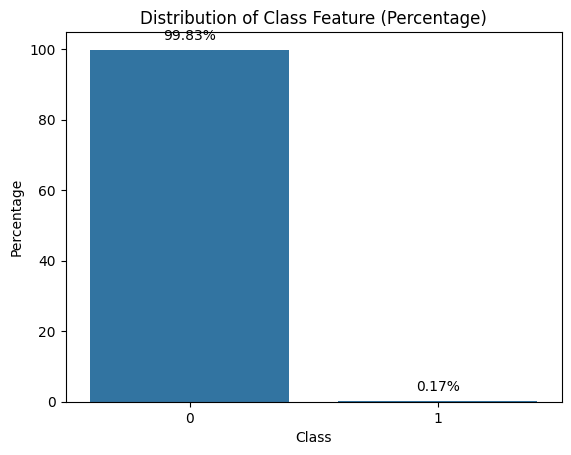

In [8]:
#Visual Distribution of the Class Feature

# Create the plot
class_counts = data_2013['Class'].value_counts(normalize=True) * 100
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Class Feature (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Annotate percentages on the bars
for p in ax.patches: 
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [9]:
#Highly imbalanced class feature displayed above, SMOTE technique highly recommended#

In [10]:
#Splitting the dataset into training and testing sets for machine learning#

In [11]:
#Independent and dependent variable
X = data_2013.drop('Class', axis=1)
y = data_2013['Class']

#Ensuring the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

In [12]:
#Performance metrics of each model, before SMOTE #

In [13]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multi Layer Perceptron": MLPClassifier()
}

for name, clf in classifier.items():
  print(f"\n========{name}========")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"\n Precision: {precision_score(y_test, y_pred)}")
  print(f"\n Recall: {recall_score(y_test, y_pred)}")
  print(f"\n F1_Score: {f1_score(y_test, y_pred)}")


========Logistic Regression========

 Accuracy: 0.9991541254009093

 Precision: 0.875

 Recall: 0.5444444444444444

 F1_Score: 0.6712328767123288

========Decision Tree Classifier========

 Accuracy: 0.9990836358509851

 Precision: 0.7065217391304348

 Recall: 0.7222222222222222

 F1_Score: 0.7142857142857143

========Random Forest Classifier========

 Accuracy: 0.9995065731505305

 Precision: 0.9696969696969697

 Recall: 0.7111111111111111

 F1_Score: 0.8205128205128205

========Gaussian Naive Bayes========

 Accuracy: 0.977919148486237

 Precision: 0.05440613026819923

 Recall: 0.7888888888888889

 F1_Score: 0.1017921146953405

========Multi Layer Perceptron========

 Accuracy: 0.9995241955380115

 Precision: 0.9701492537313433

 Recall: 0.7222222222222222

 F1_Score: 0.8280254777070064


'''The results from the models suggest possible overfitting, as evidenced by high accuracy and precision but low recall and 
F1 scores in some cases. This indicates that the model may be memorizing the training data, which hampers its ability to 
effectively detect positive cases in new, unseen data. This could be due to the highly imbalanced nature of the dataset, where 
fraud cases make up only 0.172% of the total transactions. To address this, techniques like Stratified Sampling or Resampling 
(such as SMOTE/Undersampling) would be used to balance the dataset, improving the model’s ability to detect fraud more effectively.'''

#### **Undersampling (handling the Imbalanced data)**

In [14]:
legitimate = data_2013[data_2013["Class"] ==0]
fraudulent = data_2013[data_2013["Class"] ==1]

In [15]:
legitimate.shape

(283253, 30)

In [16]:
fraudulent.shape

(473, 30)

In [17]:
#owing to the fact that the minority class is 473 cases, the majority sample of 473 is taken out of the whole for undersampling
#purposes

In [18]:
#Taking a sample of the majority class (legitimate) for undersampling analysis
legitimate_sample = legitimate.sample(n=473, random_state=42)

#check the shape of the new sample dimension
legitimate_sample.shape

(473, 30)

In [19]:
new_data_2013 = pd.concat([legitimate_sample,fraudulent], ignore_index=True)

new_data_2013.head()
new_data_2013.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112,1
945,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,-0.183478,1


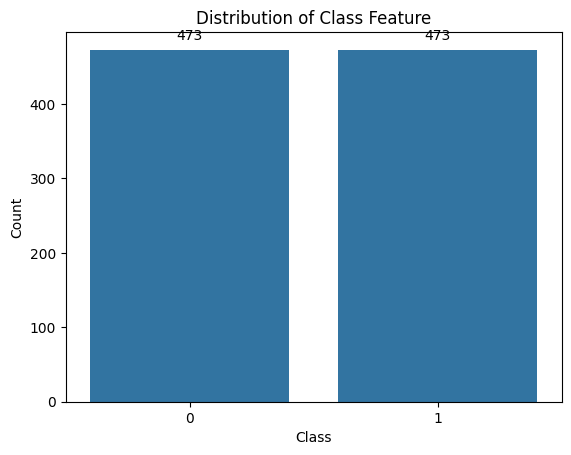

In [20]:
#Visual Distribution of the Class Feature

# Visualize the distribution of the Class feature

# Create the count plot for the undersampled data
ax = sns.countplot(x='Class', data=new_data_2013)
plt.title('Distribution of Class Feature')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [21]:
#the figure above shows a balanced distribution in the class feature resulting from undersampled technique.
# henceforth, retrain the models with the new undersampled data and test

In [22]:
#split the dataset into train and test set
X = new_data_2013.drop('Class', axis=1)
y = new_data_2013['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#machine learning algorithms
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multi Layer Perceptron": MLPClassifier()
}

for name, clf in classifier.items():
  print(f"\n========{name}========")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"\n Precision: {precision_score(y_test, y_pred)}")
  print(f"\n Recall: {recall_score(y_test, y_pred)}")
  print(f"\n F1_Score: {f1_score(y_test, y_pred)}")


========Logistic Regression========

 Accuracy: 0.9315789473684211

 Precision: 0.9587628865979382

 Recall: 0.9117647058823529

 F1_Score: 0.9346733668341709

========Decision Tree Classifier========

 Accuracy: 0.8947368421052632

 Precision: 0.9270833333333334

 Recall: 0.8725490196078431

 F1_Score: 0.898989898989899

========Random Forest Classifier========

 Accuracy: 0.9368421052631579

 Precision: 0.9787234042553191

 Recall: 0.9019607843137255

 F1_Score: 0.9387755102040817

========Gaussian Naive Bayes========

 Accuracy: 0.9105263157894737

 Precision: 0.9775280898876404

 Recall: 0.8529411764705882

 F1_Score: 0.9109947643979057

========Multi Layer Perceptron========

 Accuracy: 0.9368421052631579

 Precision: 0.9787234042553191

 Recall: 0.9019607843137255

 F1_Score: 0.9387755102040817


C:\Program Files\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
#from the values above,the models seems to perform better, having that the overfitting has been addressed using the Undersampling
#-technique, but the new problem is that alot of data (99.8%) was lost in this process, possible patterns for legitimate
#transaction detection lost in the process. Hence the Oversampling Technique would be explored.

#### **OverSampling (Imbalanced Datasets)**

In [24]:
# the originbal data
X = data_2013.drop('Class', axis = 1)
y = data_2013['Class']

X.shape
y.shape

from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

#check the new value count
y_res.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [25]:
#Visual Distribution of the Class Feature#

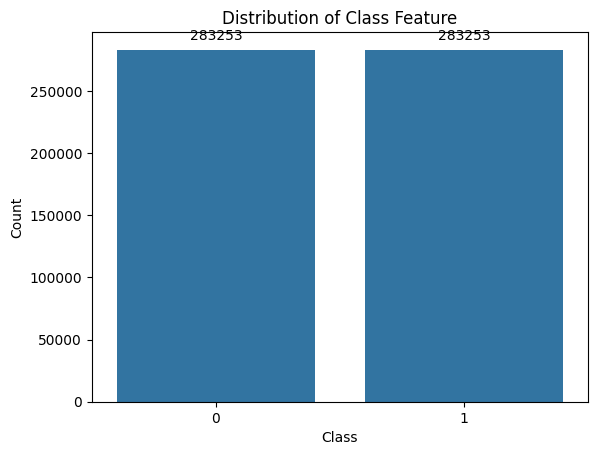

In [26]:
# Create the count plot for the resampled data
ax = sns.countplot(x='Class', data=y_res.to_frame())
plt.title('Distribution of Class Feature')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

In [27]:
#split the dataset into train and test set
X = data_2013.drop('Class', axis=1)
y = data_2013['Class']

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

#machine learning algorithms
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multi Layer Perceptron": MLPClassifier()
}

for name, clf in classifier.items():
  print(f"\n========{name}========")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"\n Precision: {precision_score(y_test, y_pred)}")
  print(f"\n Recall: {recall_score(y_test, y_pred)}")
  print(f"\n F1_Score: {f1_score(y_test, y_pred)}")


========Logistic Regression========

 Accuracy: 0.9441580907662707

 Precision: 0.9720747663551402

 Recall: 0.9149703548619785

 F1_Score: 0.942658534153835

========Decision Tree Classifier========

 Accuracy: 0.9984201514536372

 Precision: 0.9977160927617709

 Recall: 0.9991379158676261

 F1_Score: 0.9984264981232254

========Random Forest Classifier========

 Accuracy: 0.9999029143351397

 Precision: 0.999806508355321

 Recall: 1.0

 F1_Score: 0.9999032448170008

========Gaussian Naive Bayes========

 Accuracy: 0.9116167410990097

 Precision: 0.9712945628761801

 Recall: 0.8489065606361829

 F1_Score: 0.9059859551616658

========Multi Layer Perceptron========

 Accuracy: 0.9997881767312139

 Precision: 0.9995779329265075

 Recall: 1.0

 F1_Score: 0.9997889219186997


In [ ]:
## our model still overfits, now we conduct a feature importance analysis to drop some irrelevant features from our analysis

#### **Confusion Matrix** 

#### **a. Initialize classifiers & Train**

In [35]:
# Initialize classifiers
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
naive_bayes_classifier = GaussianNB()
logistic_regression_classifier = LogisticRegression(max_iter=300, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train classifiers on the training set
random_forest_classifier.fit(X_train, y_train)
naive_bayes_classifier.fit(X_train, y_train)
logistic_regression_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### **b. Define Predictions** 

In [36]:
# Generate predictions for each model
y_pred_rfc = random_forest_classifier.predict(X_test)
y_pred_nb = naive_bayes_classifier.predict(X_test)
y_pred_lr = logistic_regression_classifier.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_dt = decision_tree_classifier.predict(X_test)

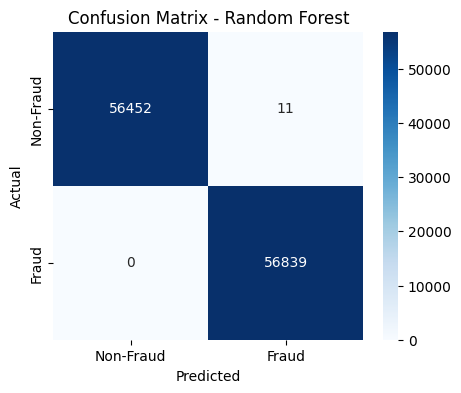

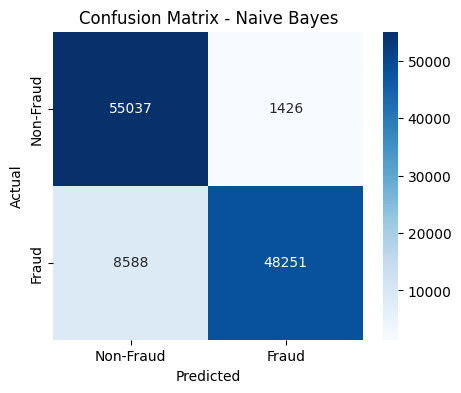

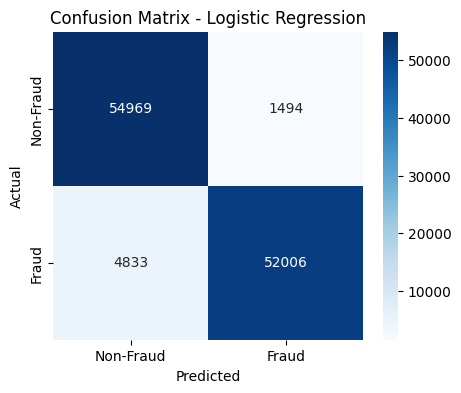

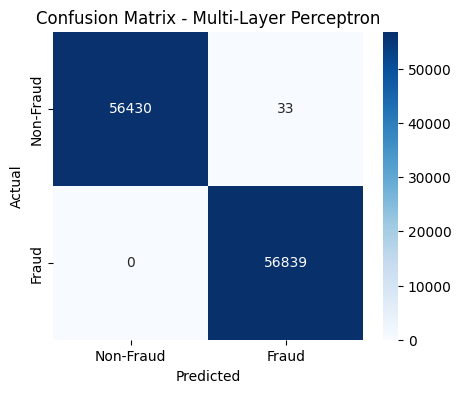

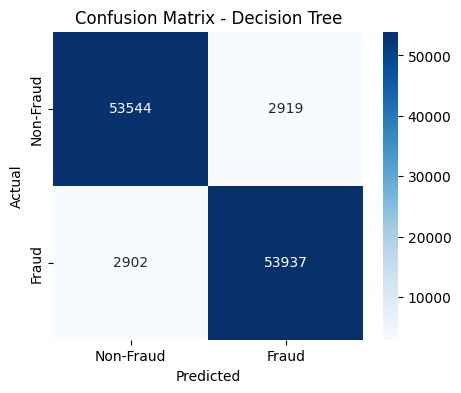

In [37]:
# Store model predictions in a dictionary
models = {
    "Random Forest": y_pred_rfc,
    "Naive Bayes": y_pred_nb,
    "Logistic Regression": y_pred_lr,
    "Multi-Layer Perceptron": y_pred_mlp,
    "Decision Tree": y_pred_dt
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Loop through models and plot confusion matrices
for model_name, y_pred in models.items():
    plot_confusion_matrix(y_test, y_pred, model_name)

#### **Save the model**

In [38]:
#Save the model with best performance (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the Random Forest Classifier
rfcl = RandomForestClassifier(n_estimators=100, random_state=42)
rfcl.fit(X_res,y_res)

RandomForestClassifier()

In [ ]:
# Save the model to a file
joblib.dump(rfcl, "credit_card_2013_model.pkl")

#### **Testing the 2013 RFC model on 2023 unseen data**

In [45]:
#Testing the 2013 RFC model on 2023 unseen data
# Load the 2013_model to verify
model = joblib.load("credit_card_2013_model.pkl")

#load unseen 2023 data
unseen_data = [
    [-0.260647805, -0.46964845, 2.4962660826315637, -0.083723913, 0.1296812361545678, 0.7328982498449426, 0.5190136179018007,	-0.130006048, 0.7271592691096374, 0.6377345411881967, -0.98702001, 0.2934381004820159, -0.941386125, 0.5490198936308889, 1.8048785784684263, 0.2155979938725388, 0.5123066605849524, 0.3336437173298195, 0.12427015635408474, 0.091201899, -0.11055168, 0.21760614382950005, -0.134794495, 0.1659591154312752, 0.1262799761446219, -0.434823981, -0.081230109, -0.151045486, 17982.1],
	[0.9850997342386376, -0.356045093, 0.5580563509382045, -0.429653903, 0.2771402629466986, 0.4286045153379263, 0.4064660422512956, -0.133118274, 0.3474518951767279, 0.5298079844330024, 0.14010733071951936, 1.564245768, 0.5740740122153044, 0.6277187366771656, 0.7061213272690174, 0.7891883649573925, 0.40380988162701126, 0.20179937246690233, -0.340687099, -0.233984156, -0.194935964, -0.605760906, 0.079469076, -0.577394874, 0.1900897076741061, 0.2965027040269081, -0.248052059, -0.064511923, 6531.37],
	[-0.260271613, -0.949384607, 1.7285377761514877, -0.457986289, 0.074061654, 1.4194811432767418, 0.7435110747693963, -0.095576013, -0.261296619, 0.6907077998548777, -0.272984925, 0.6592006642046833, 0.8051731885973652, 0.6168743863580851, 3.0690247739919467, -0.577513522, 0.8865259684145712, 0.239441661,-2.366078928, 0.3616523101955929, -0.005020278, 0.7029063846645285, 0.9450454906841043, -1.154665629, -0.605563661, -0.312894548, -0.300258035, -0.244718229, 2513.54],
	[-0.152152102, -0.508958708, 1.746840058804548, -1.090177942, 0.2494857726542817, 1.1433122633143087, 0.5182685727677246, -0.065129917, -0.205697605, 0.5752307097017012, -0.75258096, 0.7374829573995879, 0.5929936683157765, 0.559534989, -0.697663715, -0.030668984, 0.24262916568901816, 2.1786159998246157, -1.34506023, -0.378223348, -0.146927137, -0.038212458, -0.21404819, -1.893131105, 1.0039631060422864, -0.515950259, -0.16531649, 0.048423625556267516, 5384.44],
	[-0.206819521,-0.165280204,1.5270526784614766, -0.448292663, 0.10612511416543663, 0.5305488615008258, 0.658849134, -0.212660011, 1.0499208392737625, 0.9680461083540552, -1.203171107, 1.0295774241594398, 1.439310226262037, 0.24145399906423046, 0.1530078543748829, 0.22453812914300111, 0.3664661955649724, 0.2917815527861102, 0.44531670875705803, 0.24723701340838045, -0.106984018, 0.729727387, -0.161665704, 0.31256100953490806, -0.414116194, 1.071125586437274, 0.023711598569375818, 0.419117267, 14278.97],
	[1.0380649788746388, -0.281000334, 0.3197145969661849, -0.166063681, 0.42225112163261275, 0.33883266507387844, 0.4584694557461049, -0.155914438, 0.5451059179864336, 0.4264764880388101, -1.114534417, 0.3524413814973069, -0.273123019, 0.360191082, 1.6885393395401553, 0.8740089389188809, 0.5680546391012088, 0.601730617, -0.734773342, -0.307616088, -0.129373705, -0.146982227, -0.200894475, -1.347699403, 1.0598993842433273, -0.567794448, -0.188276427, -0.013494804, 7181.94],
	[-0.154962106, -0.069602429, 0.3122570910417719, -0.032756964, 1.2313555011270236, -0.550709051, 0.6256827525750606, -0.160252402, 0.3257961064159742, -0.149176862, -0.304583267, 0.2445913888636823, -0.402751742, -0.631420934, -0.098186096, 1.3358859458449805, 2.444472922309531, 1.786738664893938, -1.049742339, -0.183011882, -0.236369716, -0.737859647, -0.35603787, -0.332913526, 0.5534818371582291, -0.963456282, 0.192712736, 0.199393906, 7047.95],
	[-1.704516521, 2.5991992634149677, -1.205390552, 0.5035268915774673, -0.94967396, 3.2260022648320255, -2.323094936, -6.027711908, 0.27338901733816384, -0.698893089, 0.9902737999824864, -0.707780298, -1.89197721, -1.183117215, -0.287686755, -1.230970688, -0.722382799, -0.990629654, -0.169995932, -4.118596471, 8.087080028016498, -6.450353018, 6.343132317756874, -1.0750483, 0.3498809024854172, -0.240261075, 1.534445136055664, 2.1541018884187393, 16902.34],
	[1.0081734729793863, -0.676624189, 0.35923337614736844, -0.891125792, 0.049978885, 0.28214000896146557, 0.2852852293555259, -0.153667217, 0.091513232, 0.6999169217695553, -0.184618387, 0.42707478168174656, -0.222818844, 0.24063925464031513, -0.575480788, 1.7691992971227517, 0.765623068, 0.049331336076297826, 0.7061734349518549, 0.10452477299999693, -0.1180286, -0.330927887, -0.202494687, -0.771881593, 0.7389674726176857, -0.686247156, -0.237196346, -0.012807056, 23134.18],
	[-0.270997772, 0.3030041101993261, -0.319950472, 0.20884068870888112, -0.217003771, -0.017103652, -0.375158694, -0.041978985, -0.53053852, -0.684111654, 0.36470822855834384, -0.717433859, 0.8150037167282188, -0.762874173, 0.707967673, -0.988359838, -0.750558074, -0.952488687, 1.1783152215640609, 0.5544795436305777, 0.02595064, 0.1750544364250814, -0.18520466, -0.863288885, 0.248921414, 1.419201140973016, 0.501389408, 0.45922748468675806, 9095.81],
    ]
    

# Convert unseen data to a NumPy array
unseen_data = np.array(unseen_data)

# Make predictions
predictions = model.predict(unseen_data)

# Print the results
for i, pred in enumerate(predictions):
    print(f"Instance {i+1}: Predicted Class = {pred}")


Instance 1: Predicted Class = 0
Instance 2: Predicted Class = 0
Instance 3: Predicted Class = 0
Instance 4: Predicted Class = 0
Instance 5: Predicted Class = 0
Instance 6: Predicted Class = 0
Instance 7: Predicted Class = 0
Instance 8: Predicted Class = 0
Instance 9: Predicted Class = 0
Instance 10: Predicted Class = 0


C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### **Plotting a scatter plot displaying predictions** 

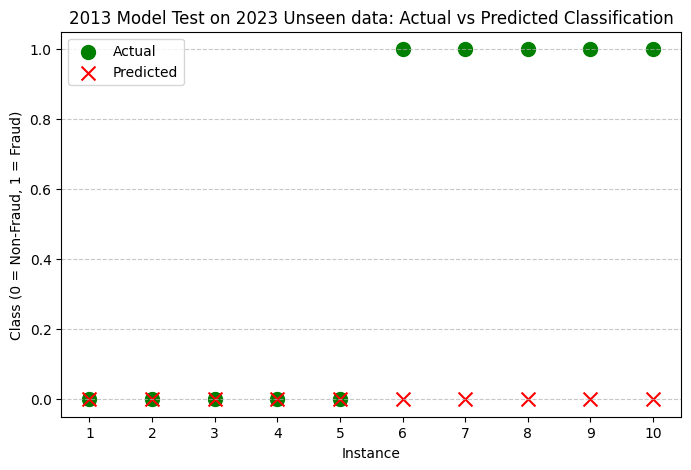

In [49]:
#scatter plot

plt.figure(figsize=(8, 5))
plt.scatter(instances, actual_labels, label="Actual", color="green", marker="o", s=100)
plt.scatter(instances, predicted_labels, label="Predicted", color="red", marker="x", s=100)

plt.xlabel("Instance")
plt.ylabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.title("2013 Model Test on 2023 Unseen data: Actual vs Predicted Classification")
plt.xticks(instances)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### **2013 Feature Importance Analysis**

In [108]:
#feature with anonymised data

feature_importance = rfcl.feature_importances_
feature_names = X_train.columns

#create a dataframe
importance_fts = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_fts = importance_fts.sort_values(by="Importance", ascending=False)

#print the result
print(importance_fts)

   Feature  Importance
13     V14    0.148309
9      V10    0.137991
10     V11    0.100526
3       V4    0.100209
11     V12    0.092560
16     V17    0.076484
6       V7    0.038780
2       V3    0.034027
8       V9    0.033648
1       V2    0.033360
15     V16    0.031361
17     V18    0.017516
7       V8    0.016399
20     V21    0.015604
0       V1    0.012360
18     V19    0.011053
4       V5    0.010676
5       V6    0.009509
28  Amount    0.009499
12     V13    0.009405
26     V27    0.008939
19     V20    0.007768
25     V26    0.007636
14     V15    0.007572
27     V28    0.007388
22     V23    0.006184
24     V25    0.005390
21     V22    0.005259
23     V24    0.004588


C:\Users\Dell 2024\AppData\Local\Temp\ipykernel_23488\820055483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_fts, palette="viridis")


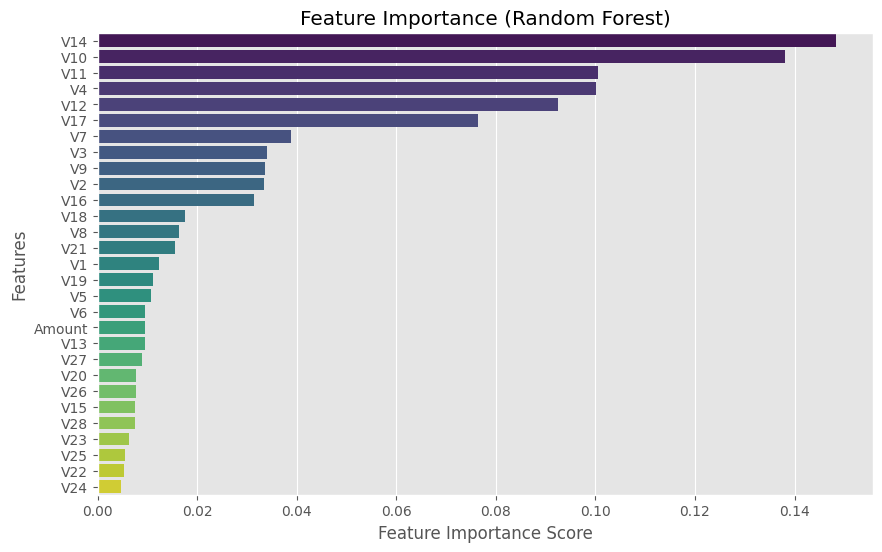

In [109]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_fts, palette="viridis")

# Add labels and title
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")

#save the plot
plt.savefig("Feature_importance.png", dpi=300, bbox_inches='tight', format="png")

#display the chart
plt.show()

### **2023 dataset**

In [50]:
#import preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import joblib


#import tool for preparing data, splitting into subsets from scikit-learn
from sklearn.model_selection import train_test_split

#machine learning libraries from scikit-learn
from sklearn.linear_model import LogisticRegression                   #Linear Models
from sklearn.ensemble import RandomForestClassifier                   #Tree-Based Models
from sklearn.tree import DecisionTreeClassifier                       #Tree-Based Models
from sklearn.naive_bayes import GaussianNB                            #Bayesian Models
from sklearn.neural_network import MLPClassifier                      #Neural Networks

#Evaluation Metrics from scikit library
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [51]:
#read in file
data_2023 = pd.read_csv("creditcard_2023.csv")

#show the first five rows of the dataset
pd.options.display.max_columns = None
data_2023.head()

#show the last five rows of the dataset
data_2023.tail()

#display the structure of the dataframe
data_2023.info()

#identify distinct categories or values in the target variable
data_2023.iloc[:, -1].unique()

#check for missing values
data_2023.isna().sum()


#check the dimension of the dataset
print("number of columns: {}".format(data_2023.shape[1]))
print("number of rows: {}".format(data_2023.shape[0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [52]:
#scaling the data by standardization (feature='Amount')
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_2023[['Amount','V10','V4','V14']] = sc.fit_transform(data_2023[['Amount','V10','V4','V14']])

#check for the transformed feature
data_2023.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


In [53]:
# dropping the 'id' feature as it has no relative significance to the analysis
data_2023 = data_2023.drop(['id'], axis=1)

#display the resultant dataframe
data_2023.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


In [54]:
#check for duplicate values
data_2023.duplicated().any()

np.True_

In [55]:
#how many duplicates are present
print(data_2023.duplicated().sum())

#display duplicate rows
data_2023[data_2023.duplicated()]

1


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
510531,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,0.990274,-0.70778,-1.891977,-1.183117,-0.287687,-1.230971,-0.722383,-0.99063,-0.169996,-4.118596,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,1.51848,1


In [56]:
#drop duplicate values
data_2023 = data_2023.drop_duplicates()
print(data_2023.shape)

#target value count
data_2023['Class'].value_counts()

(568629, 30)


Class
0    284315
1    284314
Name: count, dtype: int64

In [57]:
#drop duplicate values
data_2023 = data_2023.drop_duplicates()
print(data_2023.shape)

#target value count
data_2023['Class'].value_counts()

(568629, 30)


Class
0    284315
1    284314
Name: count, dtype: int64

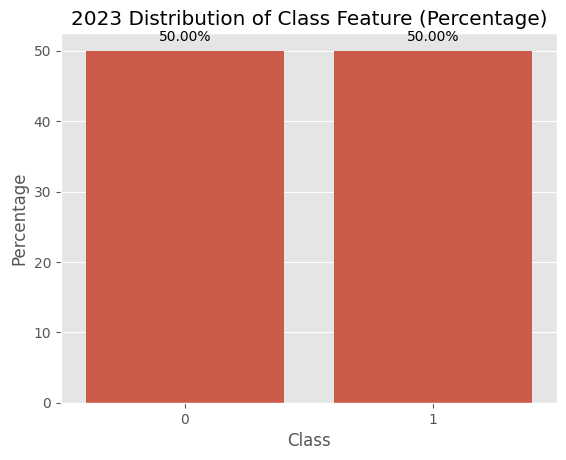

In [71]:
#Visual Distribution of the Class Feature

# Create the plot
class_counts = data_2023['Class'].value_counts(normalize=True) * 100
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('2023 Distribution of Class Feature (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')

# Annotate percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show() 

In [58]:
#Independent and dependent variable
X_2023 = data_2023.drop('Class', axis=1)
y_2023 = data_2023['Class']

#Ensuring the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X_2023, y_2023, test_size= 0.2, random_state = 100)

In [60]:
classifier = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multi Layer Perceptron": MLPClassifier()
}


for name, clf in classifier.items():
  print(f"\n========{name}========")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f"\n Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"\n Precision: {precision_score(y_test, y_pred)}")
  print(f"\n Recall: {recall_score(y_test, y_pred)}")
  print(f"\n F1_Score: {f1_score(y_test, y_pred)}")


========Logistic Regression========

 Accuracy: 0.9652498109491233

 Precision: 0.9783925267385712

 Recall: 0.9516289032665853

 F1_Score: 0.9648251493062046

========Decision Tree Classifier========

 Accuracy: 0.9972257882981904

 Precision: 0.9965285083105407

 Recall: 0.997936985892495

 F1_Score: 0.9972322497730094

========Random Forest Classifier========

 Accuracy: 0.9998461213794558

 Precision: 0.9996928369578573

 Recall: 1.0

 F1_Score: 0.9998463948880218

========Gaussian Naive Bayes========

 Accuracy: 0.9196050155637233

 Precision: 0.9776712123482691

 Recall: 0.8590917470656917

 F1_Score: 0.9145537975570779

========Multi Layer Perceptron========

 Accuracy: 0.9994636230941034

 Precision: 0.9993680496432114

 Recall: 0.9995610608281904

 F1_Score: 0.9994645459173821


#### **2023_model Confusion Matrix**

In [61]:
# Initialize classifiers
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
naive_bayes_classifier = GaussianNB()
logistic_regression_classifier = LogisticRegression(max_iter=300, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train classifiers on the training set
random_forest_classifier.fit(X_train, y_train)
naive_bayes_classifier.fit(X_train, y_train)
logistic_regression_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Generate predictions for each model
y_pred_rfc = random_forest_classifier.predict(X_test)
y_pred_nb = naive_bayes_classifier.predict(X_test)
y_pred_lr = logistic_regression_classifier.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_dt = decision_tree_classifier.predict(X_test)


# Store model predictions in a dictionary
models = {
    "Random Forest": y_pred_rfc,
    "Naive Bayes": y_pred_nb,
    "Logistic Regression": y_pred_lr,
    "Multi-Layer Perceptron": y_pred_mlp,
    "Decision Tree": y_pred_dt
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Loop through models and plot confusion matrices
for model_name, y_pred in models.items():
    plot_confusion_matrix(y_test, y_pred, model_name)

#### **Save the model**

In [ ]:
#Train the best performing model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
import joblib

# Train the Random Forest Classifier
rfcls = RandomForestClassifier(n_estimators=100, random_state=42)
rfcls.fit(X_res,y_res)

In [ ]:
# Save the model to a file
joblib.dump(rfcl, "credit_card_2013_model.pkl")

#### **Testing the 2023 RFC model on 2013 unseen data**

In [68]:
#Testing the 2013 RFC model on 2023 unseen data
# Load the 2013_model to verify
model = joblib.load("credit_card_2023_model.pkl")

#load unseen 2013 data
unseenn_data = [
    [-1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901, 0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972, -0.470400525, 0.207971242, 0.02579058, 0.40399296, 0.251412098, -0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377, -0.021053053, 149.62],
    [1.191857111, 0.266150712,	0.166480113, 0.448154078, 0.060017649, -0.082360809, -0.078802983, 0.085101655, -0.255425128, -0.166974414, 1.612726661, 1.065235311, 0.489095016, -0.143772296, 0.635558093, 0.463917041, -0.114804663, -0.18336127, -0.145783041, -0.069083135, -0.225775248, -0.638671953, 0.101288021, -0.339846476, 0.167170404, 0.125894532, -0.008983099, 0.014724169, 2.69],
    [-1.358354062, -1.340163075, 1.773209343, 0.379779593, -0.503198133, 1.800499381, 0.791460956, 0.247675787, -1.514654323, 0.207642865, 0.624501459, 0.066083685, 0.717292731, -0.165945923, 2.345864949, -2.890083194, 1.109969379, -0.121359313, -2.261857095, 0.524979725, 0.247998153, 0.771679402, 0.909412262, -0.689280956, -0.327641834, -0.139096572, -0.055352794, -0.059751841, 378.66],
    [-0.966271712, -0.185226008, 1.79299334, -0.863291275, -0.01030888, 1.247203168, 0.23760894, 0.377435875, -1.387024063, -0.054951922, -0.226487264, 0.178228226, 0.50775687, -0.287923745, -0.631418118, -1.059647245, -0.684092786, 1.965775003, -1.23262197, -0.208037781, -0.108300452, 0.005273597, -0.190320519, -1.175575332, 0.647376035, -0.221928844, 0.062722849, 0.061457629, 123.5],
    [-1.158233093, 0.877736755, 1.548717847, 0.403033934, -0.407193377, 0.095921462, 0.592940745, -0.270532677, 0.817739308, 0.753074432, -0.822842878, 0.53819555, 1.345851593, -1.119669835, 0.17512113, -0.451449183, -0.237033239, -0.038194787, 0.803486925, 0.40854236, -0.009430697, 0.798278495, -0.13745808, 0.141266984, -0.206009588, 0.502292224, 0.21942223, 0.215153147, 69.99],
	[-2.857169754, 4.045601381, -4.197298786, 5.487198631, -3.070776168, -1.422686338, -5.65131374, 2.019657395, -5.015490987, 6.319707509, 3.779602208, -8.077093646, 1.440888856, -7.891908779, 0.530452788, -7.954070045, -14.26505595, -5.771064426, 2.892169685, 0.981608722, 1.080322734, -0.56138415, 0.102678427, -0.067194723, -0.476931194, -0.103716356, 1.166961492, 0.663632067, 1],
    [-3.519029545, 4.140867176, -3.628202369, 5.505672037, -4.057462506, -0.905945283, -6.652031121, 2.634524165, -4.67940204, -6.546241815, 3.53820204, -8.042285142, 1.697509384, -8.051048902, 1.070457396, -7.395956925, -14.32962616, -4.868010236, 2.463843039, 0.898723234, 1.582555933, 0.778710245, -0.135707278, -0.0042778, 0.032706159, 0.362014053, 0.900925138, 0.554897499, 9.13],
	[-3.896582592, 4.518354703, -4.45402724, 5.547453347, -4.121458573, -1.163406658, -6.805053053, 2.928356254, -4.917129599, -6.600460622, 3.367845608, -7.88897752, 1.682603467, -7.628651916, 0.779245996, -7.533404329, -14.06462394, -4.960108633, 2.525784924, 0.757286727, 1.69104203, 0.920020577, -0.151103893, 0.011006878, 0.080303267, 0.412191351, 0.635788871, 0.50104955, 4.56],
	[-4.194073676, 4.382897362, -5.118363373, 4.45522984, -4.812620682, -1.224644707, -7.281327867, 3.332249795, -3.679658513, -7.524368337, 2.954344366, -7.099825343, 1.520368908, -7.687802767, -0.225002021, -8.520850166, -13.27729974, -5.25370462, 3.623331814, 0.579098498, 1.550472966, 0.614572855, 0.028520792, 0.013704324, -0.149512013, -0.131686656, 0.473934222, 0.473757482, 14.46],
	[-4.844371522, 5.649438648, -6.730395746, 5.252842019, -4.40956615, -1.740767456, -6.311698529, 3.449167313, -5.416284359, -7.833555571, 3.657349565, -7.781447953, 1.507720427, -8.604758868, 0.010592688, -6.553973257, -12.62439365, -4.989909738, 1.645413893, 0.28455509, 1.194888356, -0.845752532, 0.190673885, -0.216443253, -0.3250331, -0.270327593, 0.210214052, 0.391854886, 111.7]
]
    

# Convert unseen data to a NumPy array
Uunseen_data = np.array(unseenn_data)

# Make predictions
predictions = model.predict(Uunseen_data)

# Print the results
for i, pred in enumerate(predictions):
    print(f"Instance {i+1}: Predicted Class = {pred}")

Instance 1: Predicted Class = 0
Instance 2: Predicted Class = 0
Instance 3: Predicted Class = 0
Instance 4: Predicted Class = 0
Instance 5: Predicted Class = 0
Instance 6: Predicted Class = 0
Instance 7: Predicted Class = 0
Instance 8: Predicted Class = 0
Instance 9: Predicted Class = 0
Instance 10: Predicted Class = 0


C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### **Plotting a scatter plot displaying predictions**

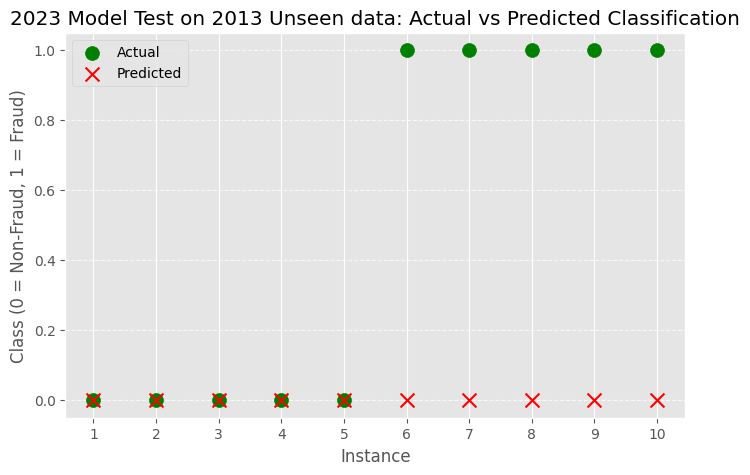

In [70]:
#scatter plot

plt.figure(figsize=(8, 5))
plt.scatter(instances, actual_labels, label="Actual", color="green", marker="o", s=100)
plt.scatter(instances, predicted_labels, label="Predicted", color="red", marker="x", s=100)

plt.xlabel("Instance")
plt.ylabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.title("2023 Model Test on 2013 Unseen data: Actual vs Predicted Classification")
plt.xticks(instances)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### **Combined Dataset: 2013 & 2023**

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [73]:
 # load datasets
data_2013 = pd.read_csv('creditcard_2013.csv')
data_2023 = pd.read_csv('creditcard_2023.csv')

In [74]:
# drop the 'Time' and 'id' features (not useful for analysis)
data_2013.drop(columns=['Time'], inplace=True, errors='ignore')
data_2023.drop(columns=['id'], inplace=True, errors='ignore')

In [75]:
# matching columns
data_2023.columns = data_2013.columns

In [76]:
#standardize the 'Amount' feature
scaler = StandardScaler()
data_2013['Amount'] = scaler.fit_transform(data_2013[['Amount']])
data_2023['Amount'] = scaler.transform(data_2023[['Amount']])

In [77]:
# merge the two datasets

#combine both datasets
combined_data = pd.concat([data_2013, data_2023], ignore_index=True)

#check class distribution
print(combined_data['Class'].value_counts())

Class
0    568630
1    284807
Name: count, dtype: int64


In [78]:
#check if the 'Amount' remains scaled
print(combined_data['Amount'].describe())

count    853437.000000
mean         31.842669
std          31.908340
min          -0.353229
25%          -0.049655
50%          23.819000
75%          59.717416
max         102.362243
Name: Amount, dtype: float64


In [79]:
# Check class distribution before SMOTE
print("Before SMOTE:\n", combined_data['Class'].value_counts())

Before SMOTE:
 Class
0    568630
1    284807
Name: count, dtype: int64


In [80]:
# Performing Data Balancing (SMOTE)

#since fraud cases are imbalanced, we apply SMOTE oversampling

#define features (X) and target (y)
X = combined_data.drop(columns=['Class'])
y = combined_data['Class']

# Apply SMOTE to balance classes
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X,y)

#checked new class distribution
print(y_resampled.value_counts())

Class
0    568630
1    568630
Name: count, dtype: int64


In [81]:
#Check new class distribution after SMOTE
print("After SMOTE:\n", y_resampled.value_counts())

After SMOTE:
 Class
0    568630
1    568630
Name: count, dtype: int64


In [82]:
#split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [83]:
# Train the RandomForest model

combined_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
combined_rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
# Evaluate Model Performance

# predict on test set
y_pred = combined_rf_model.predict(X_test)

#print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9997
Precision: 0.9998
Recall: 0.9995
Score: 0.9997


#### **Combined_model Confusion Matrix**

In [101]:
# Initialize classifiers
combined_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifiers on the training set
combined_rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

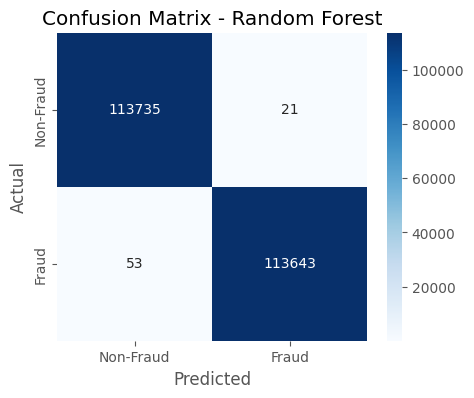

In [102]:
# Generate predictions for rfc model
y_pred_rfc = combined_rf_model.predict(X_test)


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name="Random Forest"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# plot the confusion matrix for the random forest model
plot_confusion_matrix(y_test, y_pred_rfc)

In [90]:
# Save the trained model to a file
joblib.dump(combined_rf_model, "credit_card_combined_model.pkl")

['credit_card_combined_model.pkl']

#### **Combined RFC model Test on 2013 & 2023 unseen data**

In [91]:
#Testing the 2013 RFC model on 2023 unseen data
# Load the 2013_model to verify
model = joblib.load("credit_card_combined_model.pkl")

#load unseen 2013 & 2023 data
unseen_dataset = [
    [-1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901, 0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972, -0.470400525, 0.207971242, 0.02579058, 0.40399296, 0.251412098, -0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377, -0.021053053, 149.62],
    [1.191857111, 0.266150712,	0.166480113, 0.448154078, 0.060017649, -0.082360809, -0.078802983, 0.085101655, -0.255425128, -0.166974414, 1.612726661, 1.065235311, 0.489095016, -0.143772296, 0.635558093, 0.463917041, -0.114804663, -0.18336127, -0.145783041, -0.069083135, -0.225775248, -0.638671953, 0.101288021, -0.339846476, 0.167170404, 0.125894532, -0.008983099, 0.014724169, 2.69],
    [-1.358354062, -1.340163075, 1.773209343, 0.379779593, -0.503198133, 1.800499381, 0.791460956, 0.247675787, -1.514654323, 0.207642865, 0.624501459, 0.066083685, 0.717292731, -0.165945923, 2.345864949, -2.890083194, 1.109969379, -0.121359313, -2.261857095, 0.524979725, 0.247998153, 0.771679402, 0.909412262, -0.689280956, -0.327641834, -0.139096572, -0.055352794, -0.059751841, 378.66],
    [-0.966271712, -0.185226008, 1.79299334, -0.863291275, -0.01030888, 1.247203168, 0.23760894, 0.377435875, -1.387024063, -0.054951922, -0.226487264, 0.178228226, 0.50775687, -0.287923745, -0.631418118, -1.059647245, -0.684092786, 1.965775003, -1.23262197, -0.208037781, -0.108300452, 0.005273597, -0.190320519, -1.175575332, 0.647376035, -0.221928844, 0.062722849, 0.061457629, 123.5],
    [-1.158233093, 0.877736755, 1.548717847, 0.403033934, -0.407193377, 0.095921462, 0.592940745, -0.270532677, 0.817739308, 0.753074432, -0.822842878, 0.53819555, 1.345851593, -1.119669835, 0.17512113, -0.451449183, -0.237033239, -0.038194787, 0.803486925, 0.40854236, -0.009430697, 0.798278495, -0.13745808, 0.141266984, -0.206009588, 0.502292224, 0.21942223, 0.215153147, 69.99],
	[1.0380649788746388, -0.281000334, 0.3197145969661849, -0.166063681, 0.42225112163261275, 0.33883266507387844, 0.4584694557461049, -0.155914438, 0.5451059179864336, 0.4264764880388101, -1.114534417, 0.3524413814973069, -0.273123019, 0.360191082, 1.6885393395401553, 0.8740089389188809, 0.5680546391012088, 0.601730617, -0.734773342, -0.307616088, -0.129373705, -0.146982227, -0.200894475, -1.347699403, 1.0598993842433273, -0.567794448, -0.188276427, -0.013494804, 7181.94],
	[-0.154962106, -0.069602429, 0.3122570910417719, -0.032756964, 1.2313555011270236, -0.550709051, 0.6256827525750606, -0.160252402, 0.3257961064159742, -0.149176862, -0.304583267, 0.2445913888636823, -0.402751742, -0.631420934, -0.098186096, 1.3358859458449805, 2.444472922309531, 1.786738664893938, -1.049742339, -0.183011882, -0.236369716, -0.737859647, -0.35603787, -0.332913526, 0.5534818371582291, -0.963456282, 0.192712736, 0.199393906, 7047.95],
	[-1.704516521, 2.5991992634149677, -1.205390552, 0.5035268915774673, -0.94967396, 3.2260022648320255, -2.323094936, -6.027711908, 0.27338901733816384, -0.698893089, 0.9902737999824864, -0.707780298, -1.89197721, -1.183117215, -0.287686755, -1.230970688, -0.722382799, -0.990629654, -0.169995932, -4.118596471, 8.087080028016498, -6.450353018, 6.343132317756874, -1.0750483, 0.3498809024854172, -0.240261075, 1.534445136055664, 2.1541018884187393, 16902.34],
	[1.0081734729793863, -0.676624189, 0.35923337614736844, -0.891125792, 0.049978885, 0.28214000896146557, 0.2852852293555259, -0.153667217, 0.091513232, 0.6999169217695553, -0.184618387, 0.42707478168174656, -0.222818844, 0.24063925464031513, -0.575480788, 1.7691992971227517, 0.765623068, 0.049331336076297826, 0.7061734349518549, 0.10452477299999693, -0.1180286, -0.330927887, -0.202494687, -0.771881593, 0.7389674726176857, -0.686247156, -0.237196346, -0.012807056, 23134.18],
	[-0.270997772, 0.3030041101993261, -0.319950472, 0.20884068870888112, -0.217003771, -0.017103652, -0.375158694, -0.041978985, -0.53053852, -0.684111654, 0.36470822855834384, -0.717433859, 0.8150037167282188, -0.762874173, 0.707967673, -0.988359838, -0.750558074, -0.952488687, 1.1783152215640609, 0.5544795436305777, 0.02595064, 0.1750544364250814, -0.18520466, -0.863288885, 0.248921414, 1.419201140973016, 0.501389408, 0.45922748468675806, 9095.81],
    ]
    

# Convert unseen data to a NumPy array
two_unseen_data = np.array(unseen_dataset)

# Make predictions
predictions = model.predict(two_unseen_data)

# Print the results
for i, pred in enumerate(predictions):
    print(f"Instance {i+1}: Predicted Class = {pred}")

Instance 1: Predicted Class = 0
Instance 2: Predicted Class = 0
Instance 3: Predicted Class = 0
Instance 4: Predicted Class = 0
Instance 5: Predicted Class = 0
Instance 6: Predicted Class = 1
Instance 7: Predicted Class = 1
Instance 8: Predicted Class = 1
Instance 9: Predicted Class = 1
Instance 10: Predicted Class = 1


C:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [97]:
#define the output results

predictions = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

#### **Plotting a scatter plot displaying predictions**

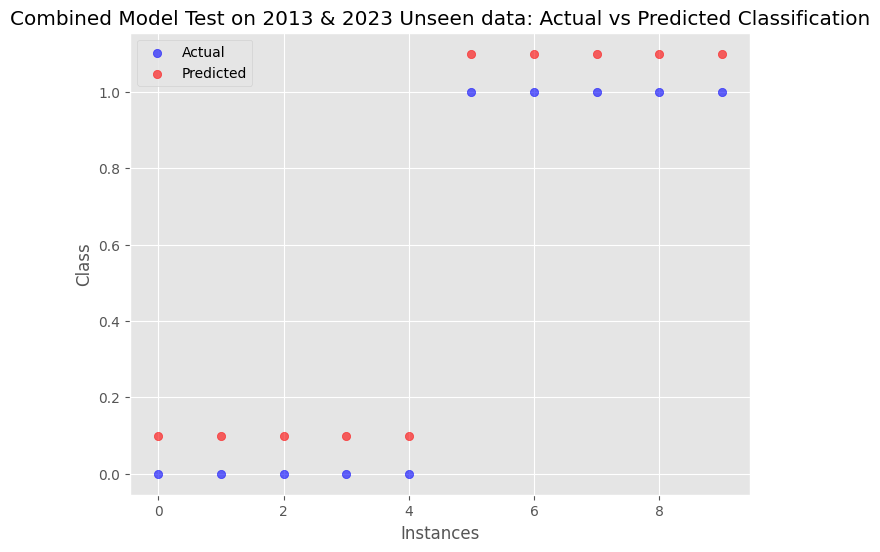

In [100]:
# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))

# Plot actual values (blue dots)
plt.scatter(range(len(actual_classes)), actual_classes, color='blue', label='Actual', alpha=0.6)

# Plot predicted values (red dots), slightly offset on the y-axis for clarity
plt.scatter(range(len(predictions)), [p + 0.1 for p in predictions], color='red', label='Predicted', alpha=0.6)

# Labels and title
plt.xlabel('Instances')
plt.ylabel('Class')
plt.title('Combined Model Test on 2013 & 2023 Unseen data: Actual vs Predicted Classification')
plt.legend()

# Show the plot
plt.show()


#### **check for Overfitting**

In [104]:
#Feature Importance Analysis

feature_importance = combined_rf_model.feature_importances_
feature_names = X_train.columns

#create a dataframe
importance_fts = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_fts = importance_fts.sort_values(by="Importance", ascending=False)

#print the result
print(importance_fts)

   Feature  Importance
13     V14    0.136530
28  Amount    0.126165
3       V4    0.114217
11     V12    0.105955
9      V10    0.071948
10     V11    0.069077
2       V3    0.054599
15     V16    0.050438
16     V17    0.037746
0       V1    0.026144
6       V7    0.024048
27     V28    0.021714
26     V27    0.020536
1       V2    0.019285
7       V8    0.016115
17     V18    0.014565
8       V9    0.012134
4       V5    0.012065
18     V19    0.009922
19     V20    0.007322
5       V6    0.007315
25     V26    0.006674
22     V23    0.006247
24     V25    0.005848
20     V21    0.005427
12     V13    0.004941
14     V15    0.004728
21     V22    0.004473
23     V24    0.003821


#### **Removing the less relevant features in our data to control overfitting**

In [105]:
X = combined_data.drop(columns=["Class","V22","V24","V15","V13","V21","V26","V25","V6","V20","V27","V19","V5","V9"])
y = combined_data['Class']

#split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the RandomForest model

combined_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
combined_rf_model.fit(X_train, y_train)

# Evaluate Model Performance

# predict on test set
y_pred = combined_rf_model.predict(X_test)

#print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9997
Precision: 0.9998
Recall: 0.9995
F1-Score: 0.9997


#### **applying Regularization techniques in Random Forest (Pruning, Max Depth) to handle overfitting**

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with depth restriction
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [107]:
# Evaluate Model Performance

# predict on test set
y_pred = rf_model.predict(X_test)

#print evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

Accuracy: 0.9559
Precision: 0.9954
Recall: 0.9159
F1-Score: 0.9540


In [111]:
#observation:from the above analysis, the model generalises appriopriately and not memorising the data, this rules out possibility of overfitting.